<a href="https://colab.research.google.com/github/HappyGithub-dev/Customer-Churn-Analysis/blob/main/Churn_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Churn Analysis Case Study

Background

StreamFlix is a subscription-based streaming service that has been experiencing higher-than-expected customer churn rates over the past few months. As a data scientist at StreamFlix, you've been tasked with analyzing customer data to identify patterns and predictors of churn, and to build a simple predictive model that can help the company identify at-risk customers for targeted retention efforts.

Your Task

In this one-hour case study, you will:

Explore a dataset containing customer information and behavior
Identify key factors associated with customer churn
Build a simple predictive model to identify customers at risk of churning
Provide actionable insights and recommendations based on your analysis

Dataset Description

The dataset streamflix_customer_data.csv contains information about 10,000 StreamFlix customers and includes the following features:
customer_id: Unique identifier for each customer

subscription_length_months: How long the customer has been subscribed (in months)

monthly_bill: Monthly subscription fee in dollars

total_usage_hours: Total content watched in the last month

device_count: Number of devices registered to the account

has_premium_content: Whether the customer has access to premium content (1=Yes, 0=No)

support_calls_last_month: Number of customer support calls in the last month
age: Customer's age

gender: Customer's gender (M or F)

churn: Whether the customer churned in the following month (1=Yes, 0=No)



In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

print("Setup Complete")

Setup Complete


In [59]:
df = pd.read_csv('/content/streamflix_customer_data.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df)

      customer_id  subscription_length_months  monthly_bill  \
0               1                        39.0     10.145333   
1               2                        36.4     23.798208   
2               3                        29.0     29.719748   
3               4                        10.5     18.666424   
4               5                        43.0     17.898365   
5               6                         8.0     23.733800   
6               7                        14.7     31.543048   
7               8                        39.0     18.337832   
8               9                        40.6     19.420053   
9              10                        19.0     28.746516   
10             11                        16.1     28.239479   
11             12                         7.7     14.844511   
12             13                        11.0     11.368558   
13             14                        24.0     19.660997   
14             15                        53.0     14.39

In [60]:
df.head()

customer_id  subscription_length_months  monthly_bill  total_usage_hours  \
0            1                        39.0     10.145333           1.386439   
1            2                        36.4     23.798208          24.255271   
2            3                        29.0     29.719748           9.945667   
3            4                        10.5     18.666424           5.457022   
4            5                        43.0     17.898365          15.652572   

   device_count  has_premium_content  support_calls_last_month  age gender  \
0             1                    0                         0   53      M   
1             5                    0                         6   26      F   
2             5                    0                         0   52      F   
3             1                    1                         3   20      M   
4             5                    0                         0   42      F   

   churn  
0      0  
1      1  
2      0  
3      1  
4      0

In [61]:
print(df.columns)

Index(['customer_id', 'subscription_length_months', 'monthly_bill',
       'total_usage_hours', 'device_count', 'has_premium_content',
       'support_calls_last_month', 'age', 'gender', 'churn'],
      dtype='object')


In [62]:
print(df.shape)

(10000, 10)


In [63]:
df['gender'] = df['gender'].map({'M': 0,'F': 1})

In [64]:
print(df.head())

   customer_id  subscription_length_months  monthly_bill  total_usage_hours  \
0            1                        39.0     10.145333           1.386439   
1            2                        36.4     23.798208          24.255271   
2            3                        29.0     29.719748           9.945667   
3            4                        10.5     18.666424           5.457022   
4            5                        43.0     17.898365          15.652572   

   device_count  has_premium_content  support_calls_last_month  age  gender  \
0             1                    0                         0   53       0   
1             5                    0                         6   26       1   
2             5                    0                         0   52       1   
3             1                    1                         3   20       0   
4             5                    0                         0   42       1   

   churn  
0      0  
1      1  
2      0  
3     

In [65]:
df['gender'].value_counts()

gender
1    5044
0    4956
Name: count, dtype: int64

In [66]:
df['subscription_length_months'].describe()

count    10000.000000
mean        28.882500
std         16.725323
min          0.700000
25%         15.000000
50%         28.000000
75%         43.000000
max         59.000000
Name: subscription_length_months, dtype: float64

In [67]:
df['device_count'].describe()

count    10000.000000
mean         3.002400
std          1.408472
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: device_count, dtype: float64

In [68]:
nan_counts = df.isnull().sum()
print(nan_counts[nan_counts>0])

Series([], dtype: int64)


In [69]:
df['has_premium_content'].describe()

count    10000.000000
mean         0.368900
std          0.482531
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: has_premium_content, dtype: float64

In [70]:
df['support_calls_last_month'].describe()


count    10000.000000
mean         0.732900
std          1.002725
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          8.000000
Name: support_calls_last_month, dtype: float64

In [71]:
df['age'].describe()

count    10000.000000
mean        43.582600
std         14.963368
min         18.000000
25%         31.000000
50%         44.000000
75%         56.250000
max         69.000000
Name: age, dtype: float64

In [72]:
df['monthly_bill'].describe()

count    10000.000000
mean        20.622976
std          6.123141
min          9.992373
25%         15.449664
50%         20.568073
75%         25.629461
max         35.954356
Name: monthly_bill, dtype: float64

In [73]:
corr_matrix = df._get_numeric_data().corr()

corr_matrix['churn']

customer_id                  -0.013300
subscription_length_months   -0.206222
monthly_bill                  0.236369
total_usage_hours            -0.151435
device_count                 -0.005836
has_premium_content          -0.146195
support_calls_last_month      0.531374
age                          -0.008693
gender                       -0.003485
churn                         1.000000
Name: churn, dtype: float64

Direct relation of churn : monthly_bill, support_calls_last_month

Opposite relation of churn : subscription_length_months, total_usage_hours, has_premium_content

Non_linear (expected) : device_count, age, gender

In [74]:
df['total_usage_hours'].describe()

count    10000.000000
mean        18.765951
std         19.239638
min          0.000186
25%          5.205099
50%         12.666338
75%         25.940249
max        172.693129
Name: total_usage_hours, dtype: float64

In [75]:
df.groupby('has_premium_content')['churn'].mean()
df.groupby('support_calls_last_month')['churn'].mean()
df.groupby(['has_premium_content', 'support_calls_last_month'])['churn'].mean()

has_premium_content  support_calls_last_month
0                    0                           0.051505
                     1                           0.170809
                     2                           0.476760
                     3                           0.794872
                     4                           0.942857
                     5                           1.000000
                     6                           1.000000
                     7                           1.000000
                     8                           1.000000
1                    0                           0.023324
                     1                           0.079268
                     2                           0.228739
                     3                           0.580645
                     4                           0.913043
                     5                           0.857143
                     6                           1.000000
                     7                           1.000000
Name: churn, dtype: float64

In [76]:
churned_with_4_plus_calls = df[(df['support_calls_last_month'] >= 3) & (df['churn'] == 1)].shape[0]
print(churned_with_4_plus_calls)

480


In [77]:
not_churned_with_4_plus_calls = df[(df['support_calls_last_month'] >= 3) & (df['churn'] == 0)].shape[0]
print(not_churned_with_4_plus_calls)

106


In [78]:
churned_with_4_plus_calls = df[(df['support_calls_last_month'] >= 4) & (df['churn'] == 1)].shape[0]
print(churned_with_4_plus_calls)

209


In [79]:
not_churned_with_4_plus_calls = df[(df['support_calls_last_month'] >= 4) & (df['churn'] == 0)].shape[0]
print(not_churned_with_4_plus_calls)

11


people with more support calls have churned

In [80]:
df['has_premium_content'].value_counts()

has_premium_content
0    6311
1    3689
Name: count, dtype: int64

In [81]:
df.groupby('total_usage_hours')['churn'].mean()

total_usage_hours
0.000186      0.0
0.002417      1.0
0.003511      0.0
0.005730      0.0
0.006660      0.0
0.008464      0.0
0.008983      0.0
0.012358      1.0
0.017153      0.0
0.019309      0.0
0.021979      1.0
0.023287      0.0
0.024109      1.0
0.024706      0.0
0.025152      0.0
0.027337      0.0
0.028454      0.0
0.028689      0.0
0.032081      0.0
0.035295      0.0
0.037551      1.0
0.038351      0.0
0.038784      0.0
0.039446      1.0
0.040266      0.0
0.041425      1.0
0.041645      1.0
0.044965      0.0
0.045110      0.0
0.045524      0.0
0.049431      0.0
0.051137      0.0
0.052440      1.0
0.055588      1.0
0.055966      0.0
0.065973      0.0
0.067573      0.0
0.068969      0.0
0.069957      0.0
0.072259      0.0
0.076971      1.0
0.079394      0.0
0.080194      0.0
0.080655      0.0
0.081880      0.0
0.082120      1.0
0.082567      0.0
0.085687      0.0
0.087254      0.0
0.089146      1.0
0.090067      0.0
0.090961      0.0
0.091587      0.0
0.092218      0.0
0.093033      0.0
0.093180      0.0
0.095408      0.0
0.095550      0.0
0.099051      0.0
0.104604      1.0
0.106332      0.0
0.112800      1.0
0.113092      0.0
0.113229      0.0
0.116464      0.0
0.118288      0.0
0.123182      0.0
0.124043      0.0
0.125784      1.0
0.127952      0.0
0.130447      0.0
0.130598      0.0
0.132285      0.0
0.136968      0.0
0.138775      1.0
0.144006      0.0
0.148521      0.0
0.149627      1.0
0.153366      0.0
0.153613      0.0
0.153807      0.0
0.154007      0.0
0.154123      0.0
0.155024      1.0
0.155103      0.0
0.156781      0.0
0.158442      1.0
0.163924      0.0
0.166528      0.0
0.168950      1.0
0.171158      0.0
0.173185      1.0
0.173235      1.0
0.174343      0.0
0.176630      0.0
0.180883      0.0
0.181310      0.0
0.181457      0.0
0.181640      1.0
0.184347      0.0
0.191803      0.0
0.192021      1.0
0.192544      0.0
0.198150      1.0
0.198195      0.0
0.198510      1.0
0.198649      0.0
0.201353      1.0
0.203483      0.0
0.204511      0.0
0.205305      0.0
0.205381      1.0
0.206281      0.0
0.210475      0.0
0.212462      0.0
0.219046      0.0
0.221187      0.0
0.223089      0.0
0.225686      0.0
0.229819      0.0
0.229841      1.0
0.230181      1.0
0.231180      0.0
0.231758      0.0
0.232490      0.0
0.236437      0.0
0.238068      0.0
0.238962      0.0
0.239449      1.0
0.240203      0.0
0.240688      0.0
0.241043      0.0
0.241049      1.0
0.242463      0.0
0.243417      0.0
0.243742      0.0
0.243794      0.0
0.244245      0.0
0.249552      1.0
0.253623      0.0
0.254003      0.0
0.254611      1.0
0.255368      0.0
0.256416      0.0
0.257120      0.0
0.258024      0.0
0.259764      0.0
0.260930      0.0
0.261232      0.0
0.263197      0.0
0.265353      0.0
0.268556      0.0
0.269115      0.0
0.270932      0.0
0.273098      0.0
0.273250      0.0
0.278236      0.0
0.283627      0.0
0.283731      0.0
0.285839      0.0
0.288212      0.0
0.289106      0.0
0.291893      0.0
0.292885      1.0
0.294290      1.0
0.294495      0.0
0.294641      0.0
0.298665      1.0
0.298859      0.0
0.300299      1.0
0.300831      0.0
0.301862      0.0
0.305648      0.0
0.310023      1.0
0.311631      0.0
0.314089      0.0
0.314942      0.0
0.316898      0.0
0.317303      0.0
0.324156      0.0
0.324215      0.0
0.336055      1.0
0.336944      0.0
0.338401      0.0
0.342806      0.0
0.343475      1.0
0.348234      0.0
0.350332      0.0
0.351270      1.0
0.353008      0.0
0.354067      0.0
0.355542      0.0
0.357474      0.0
0.363618      0.0
0.364637      0.0
0.366404      1.0
0.369428      1.0
0.371459      0.0
0.375728      0.0
0.376067      0.0
0.377306      0.0
0.379899      1.0
0.386919      0.0
0.387825      1.0
0.390899      0.0
0.392215      0.0
0.392817      0.0
0.393379      0.0
0.394721      0.0
0.395962      0.0
0.399609      0.0
0.399947      0.0
0.403830      0.0
0.403905      0.0
0.406377      1.0
0.407407      1.0
0.408778      0.0
0.409129      0.0
0.409593      0.0
0.411753      0.0
0.412005      1.0
0.41

In [82]:
df.groupby('device_count')['churn'].mean()

device_count
1    0.160325
2    0.152860
3    0.156187
4    0.148256
5    0.155216
Name: churn, dtype: float64

Churn vs device count is almost constant .

<ipython-input-83-6397fd3ff796>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='device_count', y='churn', data=df, ci=None, ax=axs)


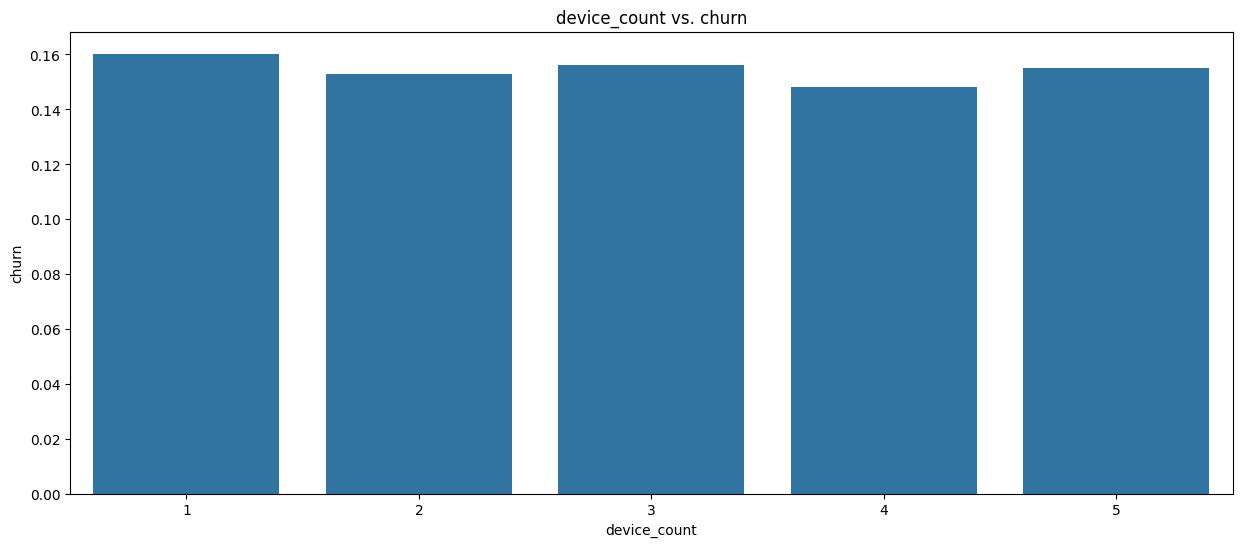

In [83]:
fig, axs = plt.subplots(figsize=(15, 6))

sns.barplot(x='device_count', y='churn', data=df, ci=None, ax=axs)
axs.set_title('device_count vs. churn')
plt.show()

In [84]:
df.groupby('gender')['churn'].mean()

gender
0    0.155771
1    0.153251
Name: churn, dtype: float64

In [85]:
df.groupby('age')['churn'].mean()

age
18    0.150235
19    0.156757
20    0.114428
21    0.147727
22    0.132275
23    0.162338
24    0.127072
25    0.169312
26    0.167513
27    0.185567
28    0.184080
29    0.173684
30    0.207921
31    0.172414
32    0.141304
33    0.125654
34    0.165746
35    0.171271
36    0.157303
37    0.142857
38    0.163158
39    0.172589
40    0.201970
41    0.134715
42    0.134328
43    0.177033
44    0.180905
45    0.129730
46    0.165803
47    0.135678
48    0.170984
49    0.159420
50    0.126984
51    0.140845
52    0.164634
53    0.146067
54    0.109948
55    0.120192
56    0.158974
57    0.147541
58    0.138756
59    0.170588
60    0.116402
61    0.200000
62    0.210000
63    0.123762
64    0.143617
65    0.148936
66    0.128571
67    0.156566
68    0.160976
69    0.134969
Name: churn, dtype: float64

<ipython-input-86-07f7aad53661>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age', y='churn', data=df, ci=None, ax=axs)


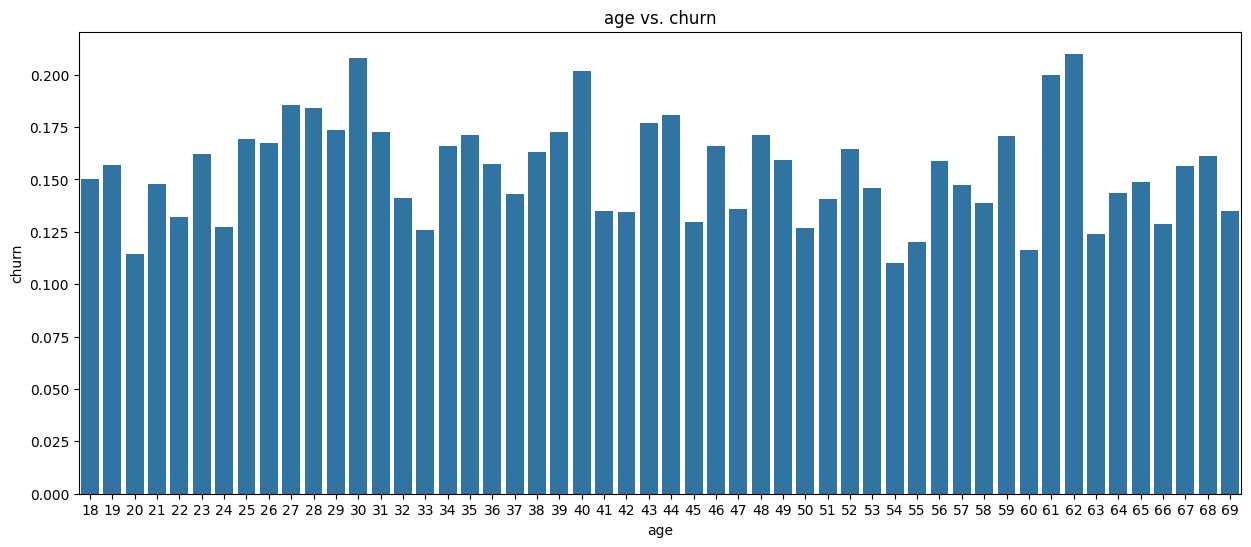

In [86]:
fig, axs = plt.subplots(figsize=(15, 6))

sns.barplot(x='age', y='churn', data=df, ci=None, ax=axs)
axs.set_title('age vs. churn')
plt.show()

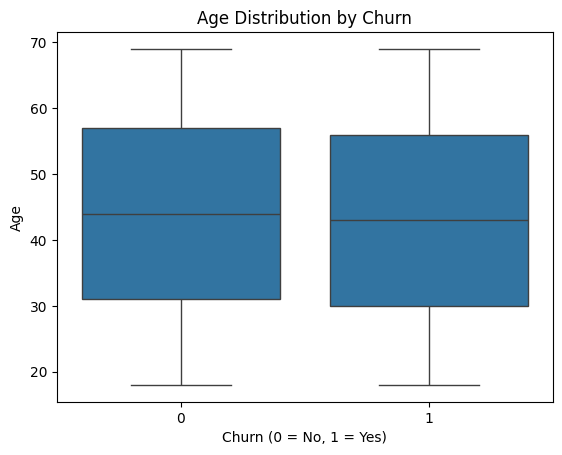

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x='churn', y='age', data=df)


plt.title("Age Distribution by Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Age")

plt.show()


In [88]:

df.groupby('age')['churn'].mean()
df.groupby('has_premium_content')['churn'].mean()
df.groupby(['age', 'has_premium_content'])['churn'].mean()

age  has_premium_content
18   0                      0.182432
     1                      0.076923
19   0                      0.196581
     1                      0.088235
20   0                      0.139535
     1                      0.069444
21   0                      0.190000
     1                      0.092105
22   0                      0.155963
     1                      0.100000
23   0                      0.216495
     1                      0.070175
24   0                      0.169643
     1                      0.057971
25   0                      0.222222
     1                      0.083333
26   0                      0.210526
     1                      0.078125
27   0                      0.206612
     1                      0.150685
28   0                      0.238462
     1                      0.084507
29   0                      0.213675
     1                      0.109589
30   0                      0.227273
     1                      0.171429
31   0                      0.192857
     1                      0.126984
32   0                      0.148760
     1                      0.126984
33   0                      0.146341
     1                      0.088235
34   0                      0.219512
     1                      0.051724
35   0                      0.218182
     1                      0.098592
36   0                      0.217391
     1                      0.047619
37   0                      0.166667
     1                      0.103896
38   0                      0.220339
     1                      0.069444
39   0                      0.264463
     1                      0.026316
40   0                      0.275591
     1                      0.078947
41   0                      0.168067
     1                      0.081081
42   0                      0.155039
     1                      0.097222
43   0                      0.230769
     1                      0.088608
44   0                      0.210084
     1                      0.137500
45   0                      0.165217
     1                      0.071429
46   0                      0.208333
     1                      0.095890
47   0                      0.165289
     1                      0.089744
48   0                      0.190083
     1                      0.138889
49   0                      0.217054
     1                      0.064103
50   0                      0.169643
     1                      0.064935
51   0                      0.193798
     1                      0.059524
52   0                      0.205357
     1                      0.076923
53   0                      0.150000
     1                      0.137931
54   0                      0.171171
     1                      0.025000
55   0                      0.166667
     1                      0.070000
56   0                      0.210084
     1                      0.078947
57   0                      0.186916
     1                      0.092105
58   0                      0.166667
     1                      0.084507
59   0                      0.196581
     1                      0.113208
60   0                      0.150000
     1                      0.057971
61   0                      0.268657
     1                      0.049180
62   0                      0.257353
     1                      0.109375
63   0                      0.147287
     1                      0.082192
64   0                      0.183333
     1                      0.073529
65   0                      0.205128
     1                      0.056338
66   0                      0.151515
     1                      0.089744
67   0                      0.209302
     1                      0.057971
68   0                      0.211382
     1                      0.085366
69   0                      0.165138
     1                      0.074074
Name: churn, dtype: float64

In [89]:
# Claim - People in middle like age 35 and above would have more devices |


df.groupby('device_count')['churn'].mean()
df.groupby('age')['churn'].mean()
df.groupby(['device_count', 'age'])['churn'].mean()

device_count  age
1             18     0.200000
              19     0.125000
              20     0.051282
              21     0.121212
              22     0.200000
              23     0.166667
              24     0.171429
              25     0.265306
              26     0.114286
              27     0.162791
              28     0.208333
              29     0.190476
              30     0.121212
              31     0.133333
              32     0.135135
              33     0.088889
              34     0.096774
              35     0.176471
              36     0.103448
              37     0.162162
              38     0.275000
              39     0.096774
              40     0.276596
              41     0.187500
              42     0.307692
              43     0.191489
              44     0.183673
              45     0.105263
              46     0.068966
              47     0.093023
              48     0.216216
              49     0.142857
              50     0.032258
              51     0.133333
              52     0.114286
              53     0.121212
              54     0.046512
              55     0.190476
              56     0.238095
              57     0.058824
              58     0.093750
              59     0.315789
              60     0.162791
              61     0.243902
              62     0.142857
              63     0.194444
              64     0.117647
              65     0.151515
              66     0.209302
              67     0.204082
              68     0.066667
              69     0.235294
2             18     0.163636
              19     0.200000
              20     0.133333
              21     0.145833
              22     0.128205
              23     0.137931
              24     0.142857
              25     0.090909
              26     0.214286
              27     0.208333
              28     0.183673
              29     0.175000
              30     0.191489
              31     0.200000
              32     0.275000
              33     0.135135
              34     0.051282
              35     0.200000
              36     0.238095
              37     0.175000
              38     0.133333
              39     0.162162
              40     0.156250
              41     0.075000
              42     0.189189
              43     0.162791
              44     0.111111
              45     0.147059
              46     0.108696
              47     0.162162
              48     0.060606
              49     0.114286
              50     0.083333
              51     0.148936
              52     0.259259
              53     0.228571
              54     0.138889
              55     0.146341
              56     0.119048
              57     0.200000
              58     0.142857
              59     0.083333
              60     0.066667
              61     0.162162
              62     0.220000
              63     0.159091
              64     0.187500
              65     0.090909
              66     0.090909
              67     0.228571
              68     0.096774
              69     0.102564
3             18     0.177778
              19     0.209302
              20     0.119048
              21     0.153846
              22     0.069767
              23     0.178571
              24     0.100000
              25     0.195122
              26     0.127660
              27     0.131579
              28     0.285714
              29     0.161290
              30     0.183673
              31     0.228571
              32     0.133333
              33     0.088235
              34     0.204545
              35     0.190476
              36     0.097561
              37     0.150000
              38     0.121212
              39     0.152174
              40     0.190476
              41     0.151515
              42     0.085106
              43     0.205128
              44     0.205882
              45     0.190476
              46     0

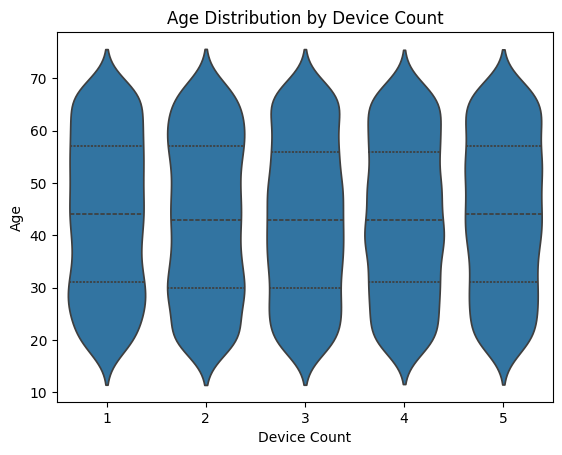

In [90]:
sns.violinplot(x='device_count', y='age', data=df, inner='quartile')

plt.title("Age Distribution by Device Count")
plt.xlabel("Device Count")
plt.ylabel("Age")
plt.show()


Age +  number of device count might be good parameter


In [91]:
df.groupby('age')['churn'].mean()
df.groupby('subscription_length_months')['churn'].mean()
df.groupby(['age', 'subscription_length_months'])['churn'].mean()

age  subscription_length_months
18   1.0                           0.000000
     1.4                           1.000000
     2.0                           0.000000
     2.8                           1.000000
     3.0                           0.000000
     3.5                           1.000000
     4.0                           0.000000
     4.2                           1.000000
     6.0                           0.000000
     6.3                           1.000000
     7.0                           0.000000
     8.0                           0.000000
     9.0                           0.000000
     10.0                          0.000000
     11.0                          0.000000
     11.2                          1.000000
     11.9                          1.000000
     12.0                          0.000000
     13.0                          0.000000
     13.3                          1.000000
     14.0                          0.000000
     14.7                          1.000000
     15.0                          0.000000
     15.4                          1.000000
     16.0                          0.000000
     16.8                          1.000000
     17.0                          0.000000
     18.0                          0.000000
     18.9                          1.000000
     19.0                          0.000000
     19.6                          1.000000
     20.0                          0.000000
     20.3                          1.000000
     21.0                          0.000000
     22.0                          0.000000
     22.4                          1.000000
     23.0                          0.000000
     24.0                          0.000000
     25.0                          0.000000
     25.9                          1.000000
     26.0                          0.000000
     27.0                          0.000000
     28.0                          0.000000
     29.0                          0.000000
     29.4                          1.000000
     30.0                          0.000000
     30.1                          1.000000
     31.0                          0.000000
     32.0                          0.000000
     33.0                          0.000000
     34.0                          0.000000
     34.3                          1.000000
     35.7                          1.000000
     36.0                          0.000000
     36.4                          1.000000
     37.0                          0.000000
     37.1                          1.000000
     37.8                          1.000000
     38.0                          0.000000
     38.5                          1.000000
     39.0                          0.000000
     39.2                          1.000000
     40.0                          0.000000
     40.6                          1.000000
     41.0                          0.000000
     42.0                          0.000000
     43.0                          0.000000
     44.0                          0.000000
     45.0                          0.000000
     46.0                          0.000000
     47.0                          0.000000
     48.0                          0.000000
     49.0                          0.000000
     50.0                          0.000000
     51.0                          0.000000
     52.0                          0.000000
     53.0                          0.000000
     54.0                          0.000000
     55.0                          0.000000
     56.0                          0.000000
     57.0                          0.000000
     58.0                          0.000000
     59.0                          0.000000
19   1.0                           0.000000
     1.4                           1.000000
     2.0                           0.000000
     3.0                           0.000000
     4.0                           0.000000
     5.0                           0.000000
     5.6                           1.000000
     6.0

In [92]:
df.groupby('has_premium_content')['churn'].mean()
df.groupby('monthly_bill')['churn'].mean()
df.groupby(['has_premium_content', 'monthly_bill'])['churn'].mean()

has_premium_content  monthly_bill
0                    9.992373        0.0
                     9.994813        0.0
                     10.002550       0.0
                     10.004954       0.0
                     10.012572       0.0
                     10.012630       0.0
                     10.015362       0.0
                     10.017110       0.0
                     10.021588       0.0
                     10.021693       0.0
                     10.022024       0.0
                     10.026241       0.0
                     10.033682       0.0
                     10.036468       0.0
                     10.043363       0.0
                     10.044024       0.0
                     10.046843       0.0
                     10.048234       0.0
                     10.053486       0.0
                     10.061551       0.0
                     10.064048       0.0
                     10.064322       0.0
                     10.065354       0.0
                     10.069199       0.0
                     10.072124       0.0
                     10.080090       0.0
                     10.087368       0.0
                     10.089450       0.0
                     10.098874       0.0
                     10.102695       0.0
                     10.108481       0.0
                     10.111666       0.0
                     10.120508       0.0
                     10.137838       0.0
                     10.145333       0.0
                     10.145679       0.0
                     10.150163       0.0
                     10.151166       0.0
                     10.154014       0.0
                     10.163382       0.0
                     10.166452       0.0
                     10.166637       0.0
                     10.167676       0.0
                     10.172199       0.0
                     10.186162       0.0
                     10.186937       0.0
                     10.187215       0.0
                     10.190208       0.0
                     10.191423       0.0
                     10.200160       0.0
                     10.200521       0.0
                     10.203446       0.0
                     10.205968       0.0
                     10.210267       0.0
                     10.216652       0.0
                     10.227106       0.0
                     10.228089       0.0
                     10.228360       0.0
                     10.231250       0.0
                     10.232495       0.0
                     10.237766       0.0
                     10.241556       0.0
                     10.241901       0.0
                     10.241928       0.0
                     10.247151       0.0
                     10.251531       0.0
                     10.258458       0.0
                     10.261632       0.0
                     10.274043       0.0
                     10.274564       0.0
                     10.275540       0.0
                     10.280302       0.0
                     10.287379       0.0
                     10.289160       0.0
                     10.294262       0.0
                     10.296212       0.0
                     10.298949       0.0
                     10.301251       0.0
                     10.302149       0.0
                     10.302212       0.0
                     10.303447       0.0
                     10.303899       0.0
                     10.303918       0.0
                     10.304332       0.0
                     10.304720       0.0
                     10.307037       0.0
                     10.307071       0.0
                     10.308405       0.0
                     10.312164       0.0
                     10.326146       0.0
                     10.328196       0.0
                     10.332963       0.0
                     10.335761       0.0
                     10.336519       0.0
                     10.339363       0.0
                     10.342903       0.0
                     10.343401

Someone with premium content has higher monthly bill





In [93]:
df.groupby('monthly_bill')['churn'].mean()

monthly_bill
9.992373     0.0
9.993704     0.0
9.994813     0.0
10.002550    0.0
10.002789    0.0
10.004954    0.0
10.010446    0.0
10.012572    0.0
10.012630    0.0
10.015362    0.0
10.017110    0.0
10.017360    0.0
10.021588    0.0
10.021693    0.0
10.022024    0.0
10.026241    0.0
10.028638    0.0
10.033682    0.0
10.033683    0.0
10.036468    0.0
10.042149    0.0
10.043363    0.0
10.044024    0.0
10.046843    0.0
10.048234    0.0
10.053486    0.0
10.061551    0.0
10.064048    0.0
10.064322    0.0
10.065354    0.0
10.068282    0.0
10.069199    0.0
10.072124    0.0
10.076881    0.0
10.080090    0.0
10.087368    0.0
10.087689    0.0
10.089450    0.0
10.091576    0.0
10.096283    0.0
10.097971    0.0
10.098874    0.0
10.102695    0.0
10.103260    0.0
10.107591    0.0
10.108481    0.0
10.108564    0.0
10.111666    0.0
10.119900    0.0
10.120508    0.0
10.126815    0.0
10.130858    0.0
10.135456    0.0
10.137838    0.0
10.138069    0.0
10.145333    0.0
10.145679    0.0
10.146134    0.0
10.150163    0.0
10.150637    0.0
10.151166    0.0
10.151694    0.0
10.153966    0.0
10.154014    0.0
10.155306    0.0
10.161384    0.0
10.163382    0.0
10.166452    0.0
10.166637    0.0
10.167326    0.0
10.167676    0.0
10.168256    0.0
10.169973    0.0
10.172199    0.0
10.178397    0.0
10.185588    0.0
10.186162    0.0
10.186937    0.0
10.187215    0.0
10.190208    0.0
10.191423    0.0
10.191473    0.0
10.197274    0.0
10.200160    0.0
10.200521    0.0
10.201033    0.0
10.203446    0.0
10.205968    0.0
10.210267    0.0
10.210569    0.0
10.216652    0.0
10.227106    0.0
10.227957    0.0
10.228089    0.0
10.228360    0.0
10.231250    0.0
10.232495    0.0
10.237766    0.0
10.238194    0.0
10.238512    0.0
10.240964    0.0
10.241556    0.0
10.241901    0.0
10.241928    0.0
10.247151    0.0
10.251531    0.0
10.254626    0.0
10.258189    0.0
10.258458    0.0
10.260345    0.0
10.261632    0.0
10.264664    0.0
10.266444    0.0
10.274043    0.0
10.274564    0.0
10.275423    0.0
10.275540    0.0
10.280302    0.0
10.280683    0.0
10.282943    0.0
10.284478    0.0
10.286177    0.0
10.287379    0.0
10.289160    0.0
10.290451    0.0
10.291761    0.0
10.293484    0.0
10.294262    0.0
10.296212    0.0
10.298949    0.0
10.299965    0.0
10.301251    0.0
10.302149    0.0
10.302212    0.0
10.303447    0.0
10.303899    0.0
10.303918    0.0
10.304332    0.0
10.304720    0.0
10.307037    0.0
10.307071    0.0
10.307868    0.0
10.308405    0.0
10.312164    0.0
10.316933    0.0
10.326146    0.0
10.328196    0.0
10.331870    0.0
10.332963    0.0
10.335761    0.0
10.336519    0.0
10.339363    0.0
10.341850    0.0
10.342903    0.0
10.343401    0.0
10.345960    0.0
10.346676    0.0
10.347471    0.0
10.351204    0.0
10.353992    0.0
10.354106    0.0
10.356768    0.0
10.357433    0.0
10.357620    0.0
10.359145    0.0
10.360625    0.0
10.360964    0.0
10.361167    0.0
10.362932    0.0
10.365687    0.0
10.367445    0.0
10.368553    0.0
10.371953    0.0
10.371984    0.0
10.371986    0.0
10.374979    0.0
10.376368    0.0
10.378703    0.0
10.378925    0.0
10.380053    0.0
10.380451    0.0
10.382645    0.0
10.383786    0.0
10.384515    0.0
10.384642    0.0
10.390471    0.0
10.390688    0.0
10.390920    0.0
10.391054    0.0
10.395606    0.0
10.396209    0.0
10.399542    0.0
10.399841    0.0
10.400232    0.0
10.401429    0.0
10.402869    0.0
10.404827    0.0
10.404977    0.0
10.408127    0.0
10.411156    0.0
10.413845    0.0
10.422958    0.0
10.424002    0.0
10.424777    0.0
10.429070    0.0
10.430784    0.0
10.432573    0.0
10.432799    0.0
10.433133    0.0
10.433315    0.0
10.435449    0.0
10.437331    0.0
10.438985    0.0
10.440984    0.0
10.442089    0.0
10.448043    0.0
10.451993    0.0
10.452935    0.0
10.455742    0.0
10.461839    0.0
10.465534    0.0
10.470771    0.0
10.472237    0.0
10.473407    0.0
10.474121    0.0
10.474805    0.0
10.479605    0.0
10.483399    0.0
10.487190    0.0
10.489682    0.0
10.490303    0.0
10.492795    0.0
10.496753    0.0
10.498414    0.0
10.498943

Whenever bill is more than 30$ , churn rate is higher

In [94]:
churned_high_bill_customers = df[(df['monthly_bill'] >= 30) & (df['churn'] == 1)]

num_churned_high_bill_customers = churned_high_bill_customers.shape[0]

print(f"Number of people with a monthly bill > $30 who have churned: {num_churned_high_bill_customers}")

Number of people with a monthly bill > $30 who have churned: 379


<ipython-input-95-5f73ccb97146>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_bill_range = df.groupby(bill_bins)['churn'].mean().reset_index()


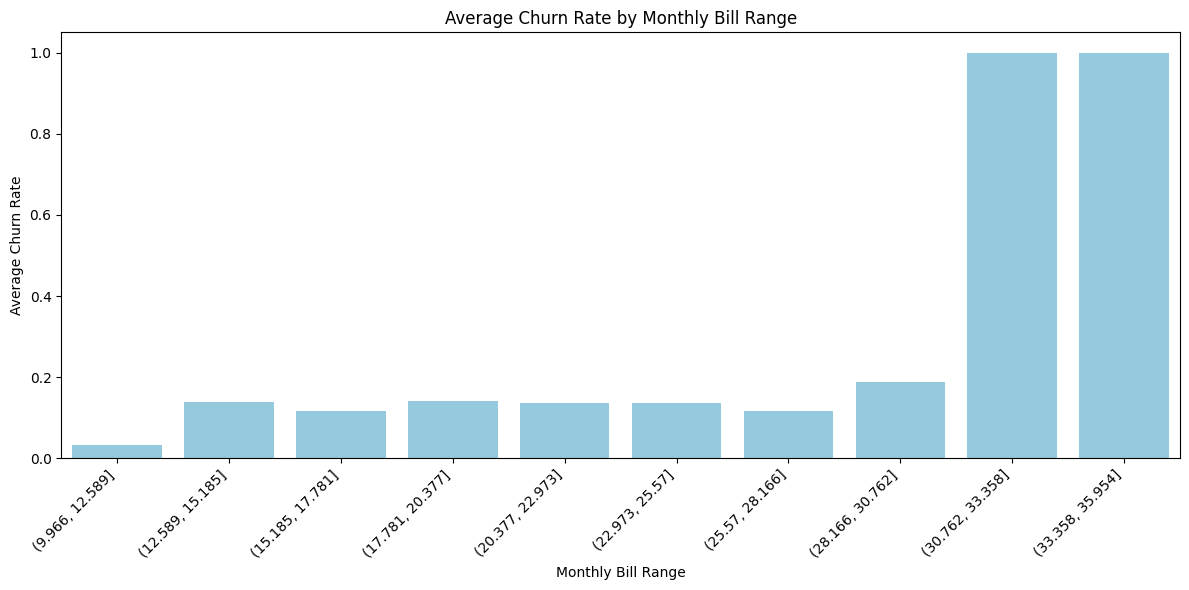

In [95]:
# Create bins for monthly_bill
bill_bins = pd.cut(df['monthly_bill'], bins=10) #adjustable

# Group by bill bins and calculate the mean churn
churn_by_bill_range = df.groupby(bill_bins)['churn'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='monthly_bill', y='churn', data=churn_by_bill_range, color='skyblue')
plt.title('Average Churn Rate by Monthly Bill Range')
plt.xlabel('Monthly Bill Range')
plt.ylabel('Average Churn Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

So higher bills have higher churn rate


<ipython-input-96-81a19ba5f829>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age_range = df.groupby(age_bins)['churn'].mean().reset_index()


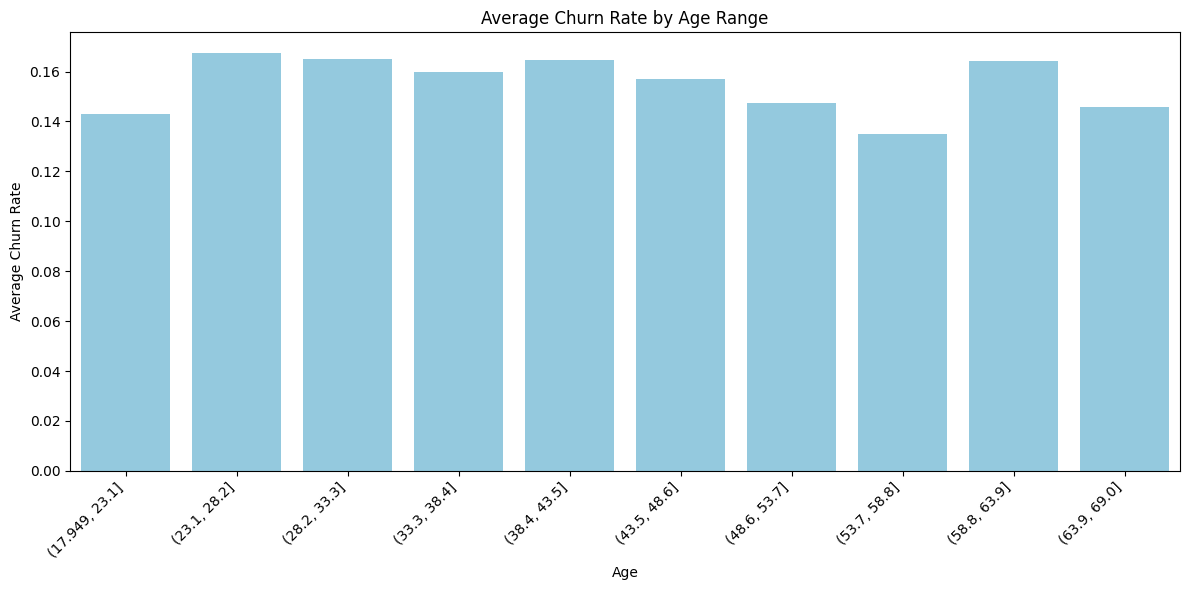

In [96]:
age_bins = pd.cut(df['age'], bins=10)

churn_by_age_range = df.groupby(age_bins)['churn'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='churn', data=churn_by_age_range, color='skyblue')
plt.title('Average Churn Rate by Age Range')
plt.xlabel('Age')
plt.ylabel('Average Churn Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
